# S05 T01: Transformació Registre Log amb Regular expressions

## Descripció
L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.

## Nivell 1
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

- Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

## Nivell 2
- Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

- Exercici 3
Geolocalitza les IP's.

## Nivell 3
- Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

Recuperem el fitxer amb les dades.

In [1]:
import pandas as pd
import re
hand = open('Web_access_log-akumenius.com.txt')
fsortida=open('Sortida.csv',"w")

Obrim el fitxer  per procedir al tractament de les línies.

In [2]:
numlin=0
x=0
for line in hand:
    # canviare totes les , per ;
    x=line.replace(",",";")
    x=x.replace(" ",",",6)
    x=x.replace(" \"",",\"")
    x=x.replace("\" ","\",")
    x=x.replace("[","")
    x=x.replace("]","")
    x=x.replace(":",",",1)
    fsortida.write(x)
    if numlin==55550 :
        print("El contingut original del fitxer te aquest aspecte:\n")
        print(line)
        print("\nDesprés del tractament, ha quedat:\n")
        print(x)
    numlin=numlin+1
hand.close
fsortida.close

El contingut original del fitxer te aquest aspecte:

www.akumenius.com 46.234.129.140 - - [24/Feb/2014:12:04:48 +0100] "GET //libraries/anythingSlider/images/1a.png HTTP/1.1" 200 2305 "http://www.akumenius.com/" "Mozilla/5.0 (Linux; U; Android 4.2.2; es-es; PrimuxCiclon2 Build/JDQ39) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Safari/534.30" VLOG=-


Després del tractament, ha quedat:

www.akumenius.com,46.234.129.140,-,-,24/Feb/2014,12:04:48,+0100,"GET //libraries/anythingSlider/images/1a.png HTTP/1.1",200 2305,"http://www.akumenius.com/","Mozilla/5.0 (Linux; U; Android 4.2.2; es-es; PrimuxCiclon2 Build/JDQ39) AppleWebKit/534.30 (KHTML; like Gecko) Version/4.0 Safari/534.30",VLOG=-



<function TextIOWrapper.close()>

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rcParams['figure.figsize'] = (10,10)
warnings.filterwarnings('ignore')

## Identificació de les variables

Després del tractament del fitxer, s'han identificat les diferent variables que s'importaran i han estat anomenades:

- **ConnectPoint**: lloc d'accés
- **IPAddress**: Direcció IP des d'on s'accedeix
- **C1**: Camp de contingut desconegut nº1
- **C2**: Camp de contingut desconegut nº2
- **Date**: Data de la connexió.
- **Hour**: Hora de la connexió.
- **TimeZ**: Zona horaria des d'on s'ha fet la connexió.
- **Message01**: Missatge HTML generat.
- **Resp**: Resposta generada al missatge.
- **C3**: Camp de contingut desconegut nº3.
- **Message02**: Missatge amb informació referent al programari que realitza la connexió.
- **fi**: Identificador de final de registre

In [5]:
# Open the choosen file
tips = pd.read_csv('Sortida.csv',names=['ConnectPoint','IPAddress','C1','C2','Date','Hour','TimeZ','Message01','Resp','C3','Message02','fi'],dtype=str)

In [6]:
print(f"En el dataframe creat disposem de {tips.shape[0]} registres i {tips.shape[1]} columnes")

En el dataframe creat disposem de 261819 registres i 12 columnes


In [7]:
tips.shape

(261819, 12)

In [8]:
tips.head(50)

,ConnectPoint,IPAddress,C1,C2,Date,Hour,TimeZ,Message01,Resp,C3,Message02,fi
0,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
5,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
6,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
7,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
8,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
9,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-


En el registres no hi han camps nulls, malgrat n'hi han sense informació.

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261819 entries, 0 to 261818
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ConnectPoint  261819 non-null  object
 1   IPAddress     261819 non-null  object
 2   C1            261819 non-null  object
 3   C2            261819 non-null  object
 4   Date          261819 non-null  object
 5   Hour          261819 non-null  object
 6   TimeZ         261819 non-null  object
 7   Message01     261819 non-null  object
 8   Resp          261819 non-null  object
 9   C3            261819 non-null  object
 10  Message02     261819 non-null  object
 11  fi            261819 non-null  object
dtypes: object(12)
memory usage: 24.0+ MB


In [10]:
tips.tail()

,ConnectPoint,IPAddress,C1,C2,Date,Hour,TimeZ,Message01,Resp,C3,Message02,fi
261814,www.akumenius.com,188.135.173.80,-,-,02/Mar/2014,02:44:08,+0100,GET /destinos-baratos/hoteles-en-Alvor_PORTUGA...,200 21144,http://www.akumenius.com/,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,VLOG=-
261815,www.akumenius.com,188.135.173.80,-,-,02/Mar/2014,02:44:09,+0100,GET /destinos-baratos/hoteles-baratos/ofertas-...,200 6597,http://www.akumenius.com/,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,VLOG=-
261816,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014,02:44:49,+0100,GET /destinos-caracteristicas/hoteles-baratos-...,200 10404,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
261817,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014,02:44:53,+0100,GET /destinosCaracteristicas/hoteles-baratos-e...,200 18231,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
261818,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014,02:45:27,+0100,GET /destinos-caracteristicas/hoteles-baratos-...,200 8505,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-


Pensant en la geolocalització de les connexions, esbrino quantes adreces IP diferents hi han.

In [11]:
len(tips['IPAddress'].unique())


2920

In [12]:
tips['IPAddress'].unique()

array(['127.0.0.1', '66.249.76.216', '5.255.253.53', ..., '79.155.78.117',
       '217.174.248.179', '188.135.173.80'], dtype=object)

La primera API trobada sembla funcionar quan es busca una única IP, però en intentar automatitzar per a tots el registres surten errors. Sembla que el servidor rebutja les consultes consecutives...

In [13]:
# preparacio per obtenir la latitud i la longitud a partir de la IP de connexio
import requests
import json
from time import sleep
# URL de la API
api_url = "http://ip-api.com/json/"
parametros = 'lat,lon'
data = {"fields":parametros}

def ip_scraping(ip):
    # Nos conectamos con la API
    res = requests.get(api_url+ip, data=data)
    # Obtenemos y procesamos la respuesta JSON
    api_json_res = json.loads(res.content)
    return api_json_res

def troba_lat(ip):
    #print(ip_scraping(ip))
    return (ip_scraping(ip))

def troba_lon(ip):   
    return (ip_scraping(ip))

#print(tips['IPAddress'][1199])
l=ip_scraping(tips['IPAddress'][8988])
print(l)
sleep(1)
l=ip_scraping(tips['IPAddress'][98988])
print(l)
sleep(1)


# troba_posicio(tips['IPAddress'][99],'lon')


{'status': 'success', 'country': 'United States', 'countryCode': 'US', 'region': 'CA', 'regionName': 'California', 'city': 'Mountain View', 'zip': '94043', 'lat': 37.422, 'lon': -122.084, 'timezone': 'America/Los_Angeles', 'isp': 'Google LLC', 'org': 'Google LLC', 'as': 'AS15169 Google LLC', 'query': '66.249.76.216'}
{'status': 'success', 'country': 'United States', 'countryCode': 'US', 'region': 'CA', 'regionName': 'California', 'city': 'Mountain View', 'zip': '94043', 'lat': 37.422, 'lon': -122.084, 'timezone': 'America/Los_Angeles', 'isp': 'Google LLC', 'org': 'Google LLC', 'as': 'AS15169 Google LLC', 'query': '66.249.76.216'}


In [14]:
l=ip_scraping(tips['IPAddress'][18988])
print(l)
sleep(1)

{'status': 'success', 'country': 'United States', 'countryCode': 'US', 'region': 'CA', 'regionName': 'California', 'city': 'Mountain View', 'zip': '94043', 'lat': 37.422, 'lon': -122.084, 'timezone': 'America/Los_Angeles', 'isp': 'Google LLC', 'org': 'Google LLC', 'as': 'AS15169 Google LLC', 'query': '66.249.76.216'}


Durant les proves realitzades, l'API anterior no retornava resultats a  partir de la primera búsqueda, malgrat que ara mentre poso aquest comentaris sembla funcionar...
Ha estat per aquest motiu que n'he buscat una altra

In [15]:
# https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=66.249.76.216
api_url = "https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip="+str(tips['IPAddress'][8988])
print (api_url)
res = requests.get(api_url)
api_json_res = json.loads(res.content)
print( api_json_res)

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=66.249.76.216
{'ip': '66.249.76.216', 'continent_code': 'NA', 'continent_name': 'North America', 'country_code2': 'US', 'country_code3': 'USA', 'country_name': 'United States', 'country_capital': 'Washington, D.C.', 'state_prov': 'California', 'district': 'Santa Clara', 'city': 'Mountain View', 'zipcode': '94043-1351', 'latitude': '37.42240', 'longitude': '-122.08421', 'is_eu': False, 'calling_code': '+1', 'country_tld': '.us', 'languages': 'en-US,es-US,haw,fr', 'country_flag': 'https://ipgeolocation.io/static/flags/us_64.png', 'geoname_id': '6301403', 'isp': 'Google LLC', 'connection_type': '', 'organization': 'Google LLC', 'currency': {'code': 'USD', 'name': 'US Dollar', 'symbol': '$'}, 'time_zone': {'name': 'America/Los_Angeles', 'offset': -8, 'current_time': '2021-07-25 00:46:02.478-0700', 'current_time_unix': 1627199162.478, 'is_dst': True, 'dst_savings': 1}}


In [16]:
print (api_json_res['latitude'])
print (api_json_res['longitude'])

37.42240
-122.08421


La informació que retorna la API és un diccionari, amb 24 camps que he fet servir per crear el dataframe, al que aniré incloent la informacio de geolocalització.

In [17]:
type(api_json_res)

dict

In [18]:
len((api_json_res).keys())

24

In [19]:
len((api_json_res).values())

24

In [20]:
df_infoIP = pd.DataFrame(columns=(api_json_res).keys())

In [21]:
df_infoIP


,ip,continent_code,continent_name,country_code2,country_code3,country_name,country_capital,state_prov,district,city,...,calling_code,country_tld,languages,country_flag,geoname_id,isp,connection_type,organization,currency,time_zone


In [30]:
df_infoIP=df_infoIP.append(api_json_res,ignore_index=True)

In [31]:
df_infoIP

,ip,continent_code,continent_name,country_code2,country_code3,country_name,country_capital,state_prov,district,city,...,calling_code,country_tld,languages,country_flag,geoname_id,isp,connection_type,organization,currency,time_zone
0,66.249.76.216,NA,North America,US,USA,United States,"Washington, D.C.",California,Santa Clara,Mountain View,...,+1,.us,"en-US,es-US,haw,fr",https://ipgeolocation.io/static/flags/us_64.png,6301403,Google LLC,,Google LLC,"{'code': 'USD', 'name': 'US Dollar', 'symbol':...","{'name': 'America/Los_Angeles', 'offset': -8, ..."


Amb la següent linia, a partir de la serie de IP uniques del dataframe, faig una consulta de 975 IPs per sota el maxim diari que permet la API (1000 diaries, max 30000 mensuals)

In [24]:
# en aquesta web es poden fer fins 1000 consultes diaries des del mateix usuari
# per tenir info i representar amb geopandas amb el primer tram de 975 sera suficient
# puc completar la taula en tres dies, o intentar amb varis usuaris...
#*******************************************************************************************
peticions=1
for x in tips['IPAddress'].unique():
    if peticions >=975:
        api_url = "https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip="+str(x)
        print (api_url)
        res = requests.get(api_url)
        api_json_res = json.loads(res.content)
        df_infoIP=df_infoIP.append(api_json_res,ignore_index=True)
    if peticions>=1970 : break
    peticions=peticions+1



https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=90.174.217.1
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=213.37.144.69
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=207.241.229.237
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=188.244.80.136
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=89.7.114.32
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=213.4.194.218
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=66.249.76.217
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=158.109.217.161
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=213.98.133.235
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=188.85.194.73
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.10.83.41
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.10.83.40
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.152.79.106
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=84.127.5.149
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.10.83.43
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.10.83.68
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=198.144.116.21
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.10.83.11
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=77.210.156.96
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.154.3.44
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=2.136.17.138
https:

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=202.46.54.59
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=23.23.14.220
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=157.55.33.123
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=86.97.82.18
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=199.30.24.118
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.249.68.84
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=157.56.93.61
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=220.181.108.84
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.53.219.154
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=109.120.157.179
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=217.12

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=144.76.2.2
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.9.155.80
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=37.59.18.36
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=77.227.123.208
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.85.18.241
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=208.43.225.84
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=208.43.225.85
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=67.255.115.39
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=77.224.108.21
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=199.30.20.58
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.158.59.1

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.50.143.34
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.85.49.10
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=90.174.1.32
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.221.145.71
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.197.153.27
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.196.12.48
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.242.7.145
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.234.37.0
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.211.193.21
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.197.56.37
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=54.234.7.56


https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=90.174.0.246
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=194.69.251.41
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=81.45.53.1
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.56.48.247
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=83.47.251.194
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=201.78.209.135
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=37.200.65.208
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=213.143.58.162
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=46.222.67.171
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=183.13.150.55
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=91.18

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=81.45.52.209
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=201.195.216.186
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=37.11.226.68
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=2.139.171.253
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=88.7.67.92
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=77.224.177.15
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.108.184.134
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=46.25.98.198
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=195.76.181.177
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=80.103.202.184
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=95.

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=190.0.23.203
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=188.123.253.34
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=199.30.16.128
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=77.228.1.14
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=202.46.50.18
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=84.122.81.236
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=95.61.7.17
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=88.179.185.21
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.137.214.209
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.146.76.236
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=201.255

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=85.214.138.248
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=199.30.20.11
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=76.232.177.219
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=5.50.255.124
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=46.27.161.21
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=50.10.5.106
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=206.80.118.113
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=157.55.35.102
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=65.55.24.217
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=179.58.95.44
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=199.30

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=81.33.210.204
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=149.7.16.130
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=94.76.171.236
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=81.172.12.71
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=95.20.187.136
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=31.4.190.164
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.151.59.10
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.153.0.25
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=148.251.44.239
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=157.55.36.54
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=88.19.25

https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=188.165.198.63
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=203.148.48.94
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=213.143.49.27
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=80.31.12.71
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=79.83.40.230
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=202.46.61.33
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=177.68.131.131
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=200.116.194.112
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=84.77.147.47
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=157.55.33.180
https://api.ipgeolocation.io/ipgeo?apiKey=3e9514902d8b45cda8e3e83a39b1dbef&ip=189

El dataframe generat el guardo en un csv, per poder utilitzar les dades en qualsevol altre moment i no dependre de les limitacions de la API. Si es volgués completar la info de totes les IPs a partir d'una segona i tercera consulta seria viable.

In [25]:
# guardo la info recuperada de la API en un csv, aixi disposare d'ella en consultes posteriors i la podre ampliar
# amb seguents consultes , pesar a canviar el nom en seguent consulta si no vull perdre aquesta info !!!
#******************************************************************************************************************
df_infoIP.to_csv('IP_info02.csv') # el ...03 sera per la tercera consulta quan arribi del 975 al 1950

Mentres tant, i per limitacions de temps, treballaré amb aquest dataframe amb informació d'un numero més reduït de registres, que he guardat en un fitxer .csv

In [22]:
df_infoIP = pd.read_csv('IP_info01.csv')

In [26]:
df_infoIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       975 non-null    float64
 1   ip               1965 non-null   object 
 2   continent_code   1703 non-null   object 
 3   continent_name   1965 non-null   object 
 4   country_code2    1965 non-null   object 
 5   country_code3    1965 non-null   object 
 6   country_name     1965 non-null   object 
 7   country_capital  1965 non-null   object 
 8   state_prov       1895 non-null   object 
 9   district         1647 non-null   object 
 10  city             1951 non-null   object 
 11  zipcode          1712 non-null   object 
 12  latitude         1965 non-null   object 
 13  longitude        1965 non-null   object 
 14  is_eu            1965 non-null   object 
 15  calling_code     1965 non-null   object 
 16  country_tld      1965 non-null   object 
 17  languages     

En aquestes connexions, hi ha localitzacions de diferents països

In [27]:
df_infoIP['country_code3'].unique()

array(['USA', nan, 'RUS', 'PHL', 'CHN', 'ESP', 'FRA', 'JPN', 'DEU', 'PER',
       'UKR', 'MEX', 'GRC', 'AUT', 'IRL', 'ARG', 'CHL', 'URY', 'GBR',
       'COL', 'ROU', 'MKD', 'NLD', 'PAN', 'VEN', 'ITA', 'CAN', 'NIC',
       'ECU', 'CHE', 'DNK', 'BHS', 'BES', 'CUW', 'BOL', 'BRA', 'ARE',
       'PRT', 'CZE', 'TUN', 'EGY', 'IRN', 'NGA', 'ISR', 'AUS', 'AND',
       'CRI', 'DOM', 'DZA', 'IDN', 'SWE', 'VNM', 'POL', 'TWN', 'BEL',
       'NOR'], dtype=object)

In [28]:
df_perEstat=df_infoIP['country_code3']

<AxesSubplot:>

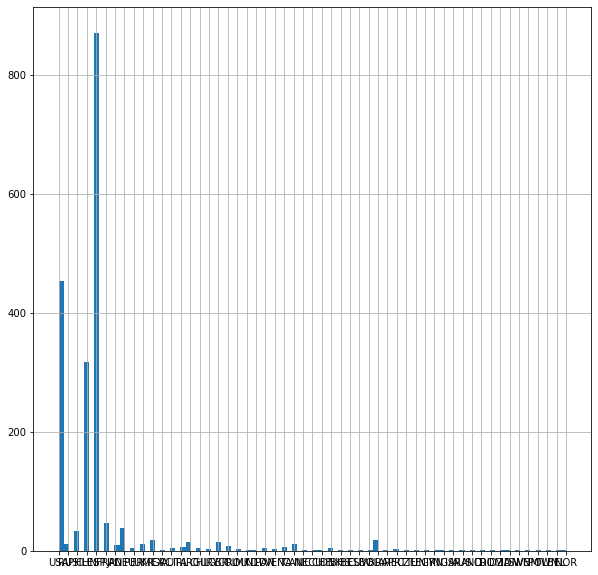

In [29]:
df_perEstat.hist(bins=100)

# Problemes per fer consultes reiterades...

In [36]:
tips['LAT']=tips['IPAddress'].apply(ip_scraping)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [30]:
tips.head()


,ConnectPoint,IPAddress,C1,C2,Date,Hour,TimeZ,Message01,Resp,C3,Message02,fi
0,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,23/Feb/2014,03:10:31,+0100,OPTIONS * HTTP/1.0,200 -,-,Apache (internal dummy connection),VLOG=-


Importo Geopandas per realitzar la visualització de les connexions geolocalitzades.

In [31]:
import geopandas
# Código de comprobación del correcto funcionamiento del paquete "geopandas"
path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


Representem els punts de les connexions a partir de la latitud i la longitud obtinguda des de l'API de geolocalització

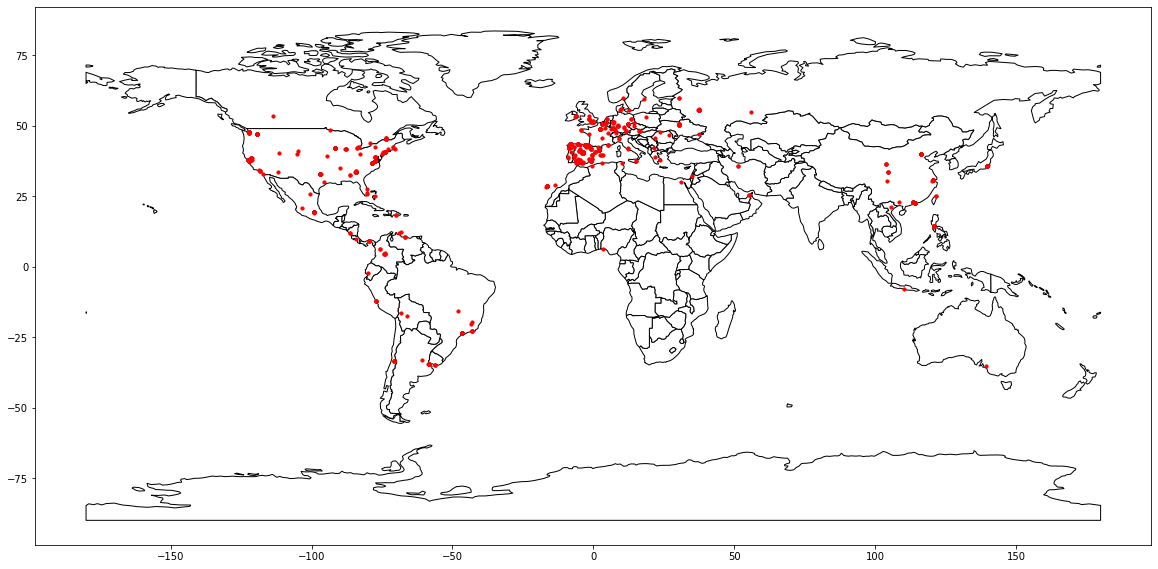

In [32]:

#gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf = geopandas.GeoDataFrame(df_infoIP, geometry=geopandas.points_from_xy(df_infoIP['longitude'],df_infoIP['latitude']))
#print(gdf.head())
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')
ax = world.plot(color='white', edgecolor='black',figsize=(20, 20))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='r',markersize=10)

plt.show()
#world.plot()

Aquí només hi han aproximadament les primeres 1000 posicions , de la primera descarrega massiva a partir de la API. Les restants i l'estudi de l'apartat 3 es deixen per més endavant si hi ha temps disponible, per no endarrerir més la resta de Sprints.

25/7/21 Actualitzat amb segona descàrrega massiva d'informacio de l'API.